# Titanic Survival Prediction

## Download dataset

In [2]:
!gdown 1SFWQ7Zi83Gff-RVrlHj0z4Llm1Nq4BBA

Downloading...
From: https://drive.google.com/uc?id=1SFWQ7Zi83Gff-RVrlHj0z4Llm1Nq4BBA
To: /content/titanic_modified_dataset.csv
100% 25.9k/25.9k [00:00<00:00, 16.1MB/s]


## Import libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Read the datasete

In [4]:
dataset_path = '/content/titanic_modified_dataset.csv'

df = pd.read_csv(dataset_path, index_col='PassengerId')

In [5]:
df.head(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Survived
PassengerId,,,,,,,,,
1,3,0,22.0,1,0,7.2500,0,0,0
2,1,1,38.0,1,0,71.2833,1,1,1
3,3,1,26.0,0,0,7.9250,0,2,1
4,1,1,35.0,1,0,53.1000,0,1,1
5,3,0,35.0,0,0,8.0500,0,0,0


## Split to X, y

In [6]:
dataset_arr = df.to_numpy().astype(np.float64)

X, y = dataset_arr[:, :-1], dataset_arr[:, -1]

## Add Bias to X

In [7]:
intercept = np.ones((X.shape[0], 1))

X_b = np.concatenate((intercept, X), axis=1)

## Split the dataset

In [8]:
val_size = 0.2
test_size = 0.125
random_state = 2
is_shuffle = True

X_train, X_val, y_train, y_val = train_test_split(
    X_b, y,
    test_size = val_size,
    random_state = random_state,
    shuffle = is_shuffle
)

X_train, X_test, y_train, y_test = train_test_split(
    X_train, y_train,
    test_size = test_size,
    random_state = random_state,
    shuffle = is_shuffle
)

## Standardize dataset

In [9]:
normalizer = StandardScaler()

X_train[:, 1:] = normalizer.fit_transform(X_train[:, 1:])
X_val[:, 1:] = normalizer.fit_transform(X_val[:, 1:])
X_test[:, 1:] = normalizer.fit_transform(X_test[:, 1:])

## Define important functions

In [10]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

In [11]:
def predict(X, theta):
  dot_product = np.dot(X, theta)
  y_hat = sigmoid(dot_product)

  return y_hat

In [1]:
def compute_loss(y_hat, y):
  y_hat = np.clip(y_hat, 1e-7, 1 - 1e-7) # To prevent log0

  return (
      -y * np.log(y_hat) - (1-y) * np.log(1-y_hat)
  ).mean()

In [12]:
def compute_gradient(X, y, y_hat):
  return np.dot(X.T, (y_hat - y)) / y.size

In [13]:
def update_theta(theta, gradient, lr):
  return theta - lr * gradient

In [14]:
def compute_accuracy(X, y, theta):
  y_hat = predict(X, theta).round()
  acc= (y_hat == y).mean()

  return acc

## Declare hyperparameters and initialize weights

In [15]:
lr = 0.01
epochs = 100
batch_size = 16

np.random.seed(random_state)
theta = np.random.uniform(size=X_train.shape[1])

## Train the model

In [16]:
train_accs = []
train_losses = []
val_accs = []
val_losses = []

for epoch in range(epochs):
  train_batch_accs = []
  train_batch_losses = []
  val_batch_accs = []
  val_batch_losses = []

  for i in range(0, X_train.shape[0], batch_size):
    X_i = X_train[i:i+batch_size]
    y_i = y_train[i:i+batch_size]

    y_hat = predict(X_i, theta)

    train_loss = compute_loss(y_hat, y_i)
    train_batch_losses.append(train_loss)

    gradient = compute_gradient(X_i, y_i, y_hat)

    theta = update_theta(theta, gradient, lr)

    train_acc = compute_accuracy(X_train, y_train, theta)
    train_batch_accs.append(train_acc)

    y_val_hat = predict(X_val, theta)
    val_loss = compute_loss(y_val_hat, y_val)
    val_batch_losses.append(val_loss)

    val_acc = compute_accuracy(X_val, y_val, theta)
    val_batch_accs.append(val_acc)

  train_batch_loss = sum(train_batch_losses) / len(train_batch_losses)
  val_batch_loss = sum(val_batch_losses) / len(val_batch_losses)
  train_batch_acc = sum(train_batch_accs) / len(train_batch_accs)
  val_batch_acc = sum(val_batch_accs) / len(val_batch_accs)

  train_losses.append(train_batch_loss)
  val_losses.append(val_batch_loss)
  train_accs.append(train_batch_acc)
  val_accs.append(val_batch_acc)

  print (f'\nEPOCH {epoch + 1}:\tTraining loss: {train_batch_loss:.3f}\tValidation loss: {val_batch_loss:.3f}')




EPOCH 1:	Training loss: 0.703	Validation loss: 0.626

EPOCH 2:	Training loss: 0.670	Validation loss: 0.604

EPOCH 3:	Training loss: 0.640	Validation loss: 0.585

EPOCH 4:	Training loss: 0.614	Validation loss: 0.569

EPOCH 5:	Training loss: 0.592	Validation loss: 0.555

EPOCH 6:	Training loss: 0.572	Validation loss: 0.543

EPOCH 7:	Training loss: 0.554	Validation loss: 0.533

EPOCH 8:	Training loss: 0.539	Validation loss: 0.525

EPOCH 9:	Training loss: 0.526	Validation loss: 0.518

EPOCH 10:	Training loss: 0.514	Validation loss: 0.513

EPOCH 11:	Training loss: 0.504	Validation loss: 0.508

EPOCH 12:	Training loss: 0.495	Validation loss: 0.504

EPOCH 13:	Training loss: 0.487	Validation loss: 0.502

EPOCH 14:	Training loss: 0.480	Validation loss: 0.499

EPOCH 15:	Training loss: 0.474	Validation loss: 0.497

EPOCH 16:	Training loss: 0.468	Validation loss: 0.496

EPOCH 17:	Training loss: 0.463	Validation loss: 0.495

EPOCH 18:	Training loss: 0.459	Validation loss: 0.494

EPOCH 19:	Training

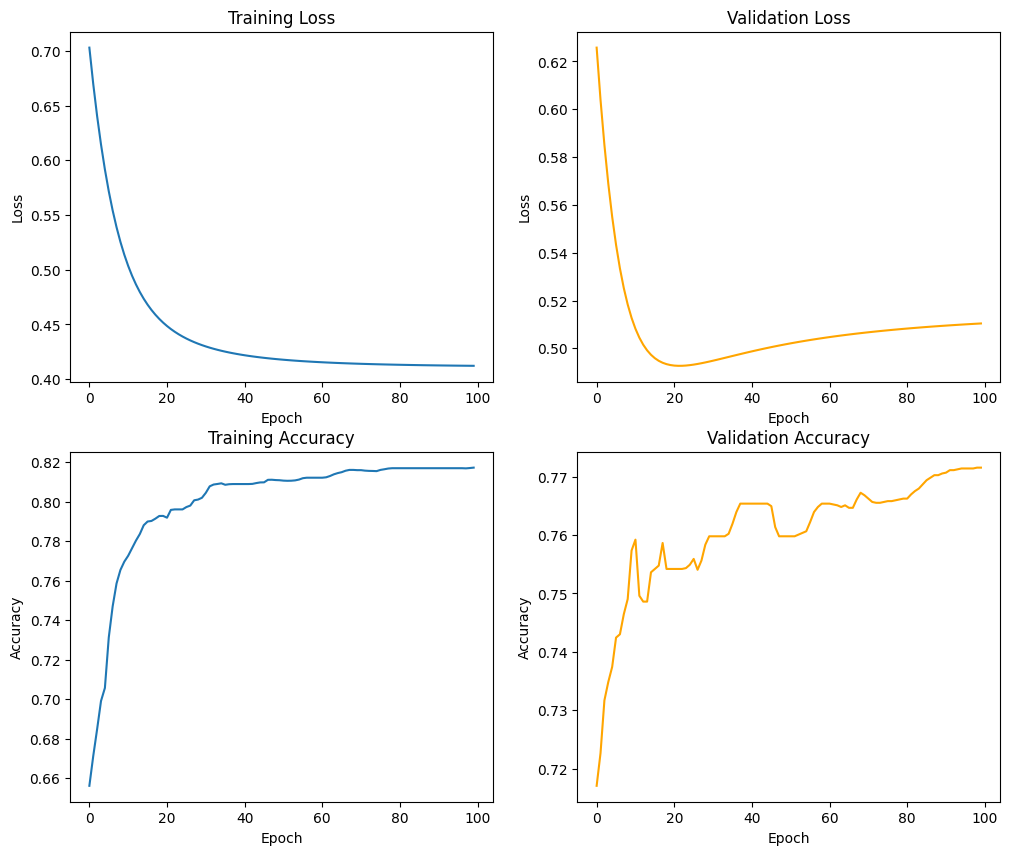

In [17]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

ax[0, 0].plot(train_losses)
ax[0, 0].set(xlabel='Epoch', ylabel='Loss')
ax[0, 0].set_title('Training Loss')

ax[0, 1].plot(val_losses, 'orange')
ax[0, 1].set(xlabel='Epoch', ylabel='Loss')
ax[0, 1].set_title('Validation Loss')

ax[1, 0].plot(train_accs)
ax[1, 0].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 0].set_title('Training Accuracy')

ax[1, 1].plot(val_accs, 'orange')
ax[1, 1].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 1].set_title('Validation Accuracy')

plt.show()

# Twitter Sentiment Analysis

## Download the dataset

In [18]:
!gdown 1dANzxlEjeCEbveFOWWqzSG-niVx-vCgK

Downloading...
From: https://drive.google.com/uc?id=1dANzxlEjeCEbveFOWWqzSG-niVx-vCgK
To: /content/sentiment_analysis.csv
100% 1.10M/1.10M [00:00<00:00, 76.8MB/s]


## Import libraries

In [29]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from nltk.tokenize import TweetTokenizer
from collections import defaultdict

## Read the dataset

In [22]:
dataset_path = '/content/sentiment_analysis.csv'
df = pd.read_csv(dataset_path, index_col='id')

df.head()

,label,tweet
id,,
1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
2,0,Finally a transparant silicon case ^^ Thanks t...
3,0,We love this! Would you go? #talk #makememorie...
4,0,I'm wired I know I'm George I was made that wa...
5,1,What amazing service! Apple won't even talk to...


## Preprocessing data

In [24]:
def text_normalize(text):
  # Retweet old acronym "RT" removal
  text = re.sub(r'^RT[\s]+', '', text)

  # Hyperlinks removal
  text = re.sub(r'https?:\/\/.*[\r\n]*', '', text)

  # Hashtags removal
  text = re.sub(r'#', '', text )

  # Punctuation removal
  text = re.sub(r'[^\w\s]', '', text)

  # Tokenization
  tokenizer = TweetTokenizer(
      preserve_case=False,
      strip_handles=True,
      reduce_len=True
  )

  text_tokens = tokenizer.tokenize(text)

  return text_tokens

In [26]:
def get_freqs(df):
  freqs = defaultdict(lambda: 0)

  for idx, row in df.iterrows():
    tweet = row['tweet']
    label = row['label']

    tokens = text_normalize(tweet)
    for token in tokens:
      pair = (token, label)
      freqs[pair] += 1

  return freqs

In [27]:
def get_feature(text, freqs):
  tokens = text_normalize(text)

  X = np.zeros(3)
  X[0] = 1

  for token in tokens:
    X[1] += freqs[(token, 0)]
    X[2] += freqs[(token, 1)]

  return X

In [30]:
X = []
y = []

freqs = get_freqs(df)

for idx, row in df.iterrows():
  tweet = row['tweet']
  label = row['label']

  X_i = get_feature(tweet, freqs)
  X.append(X_i)
  y.append(label)

X = np.array(X)
y = np.array(y)

## Split to train, val, test

In [32]:
val_size = 0.2
test_size = 0.125
random_state = 2
is_shuffle = True

X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size = val_size,
    random_state = random_state,
    shuffle = is_shuffle
)

X_train, X_test, y_train, y_test = train_test_split(
    X_train, y_train,
    test_size = test_size,
    random_state = random_state,
    shuffle = is_shuffle
)

## Normalize data

In [34]:
normalizer = StandardScaler()

X_train[:, 1:] = normalizer.fit_transform(X_train[:, 1:])
X_val[:, 1:] = normalizer.transform(X_val[:, 1:])
X_test[:, 1:] = normalizer.transform(X_test[:, 1:])

## Define functions

In [44]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

def compute_loss(y_hat, y):
  y_hat = np.clip(
      y_hat, 1e-7, 1 - 1e-7 # Prevent log0
  )

  return (-y * np.log(y_hat) - (1-y) * np.log(1-y_hat)).mean()

def predict(X, theta):
  dot_product = np.dot(X, theta)
  y_hat = sigmoid(dot_product)

  return y_hat

def compute_gradient(X, y, y_hat):
  return np.dot(X.T, (y_hat - y)) / y.size

def update_theta(theta, gradient, lr):
  return theta - lr * gradient

def compute_accuracy(X, y, theta):
  y_hat = predict(X, theta).round()
  acc = (y_hat == y).mean()

  return acc

## Declare hyperparemeters and initialize weights

In [36]:
lr = 0.01
epochs = 200
batch_size = 128

np.random.seed(random_state)
theta = np.random.uniform(
    size=X_train.shape[1]
)

## Train the model

In [45]:
train_accs = []
train_losses = []
val_accs = []
val_losses = []

for epoch in range(epochs):
  train_batch_accs = []
  train_batch_losses = []
  val_batch_accs = []
  val_batch_losses = []

  for i in range(0, X_train.shape[0], batch_size):
    X_i = X_train[i:i+batch_size]
    y_i = y_train[i:i+batch_size]

    y_hat = predict(X_i, theta)

    train_batch_loss = compute_loss(y_hat, y_i)
    train_batch_losses.append(train_batch_loss)

    gradient = compute_gradient(X_i, y_i, y_hat)

    theta = update_theta(theta, gradient, lr)

    train_batch_acc = compute_accuracy(X_i, y_i, theta)
    train_batch_accs.append(train_batch_acc)

    y_val_hat = predict(X_val, theta)
    val_loss = compute_loss(y_val_hat, y_val)
    val_batch_losses.append(val_loss)

    val_acc = compute_accuracy(X_val, y_val, theta)
    val_batch_accs.append(val_acc)

  train_batch_loss = sum(train_batch_losses) / len(train_batch_losses)
  val_batch_loss = sum(val_batch_losses) / len(val_batch_losses)
  train_batch_acc = sum(train_batch_accs) / len(train_batch_accs)
  val_batch_acc = sum(val_batch_accs) / len(val_batch_accs)

  train_losses.append(train_batch_loss)
  val_losses.append(val_batch_loss)
  train_accs.append(train_batch_acc)
  val_accs.append(val_batch_acc)

  print (f'\nEPOCH {epoch + 1}:\tTraining loss: {train_batch_loss:.3f}\tValidation loss: {val_batch_loss:.3f}')


EPOCH 1:	Training loss: 0.380	Validation loss: 0.374

EPOCH 2:	Training loss: 0.380	Validation loss: 0.374

EPOCH 3:	Training loss: 0.380	Validation loss: 0.374

EPOCH 4:	Training loss: 0.380	Validation loss: 0.374

EPOCH 5:	Training loss: 0.380	Validation loss: 0.374

EPOCH 6:	Training loss: 0.380	Validation loss: 0.374

EPOCH 7:	Training loss: 0.380	Validation loss: 0.374

EPOCH 8:	Training loss: 0.380	Validation loss: 0.374

EPOCH 9:	Training loss: 0.380	Validation loss: 0.374

EPOCH 10:	Training loss: 0.380	Validation loss: 0.374

EPOCH 11:	Training loss: 0.380	Validation loss: 0.374

EPOCH 12:	Training loss: 0.380	Validation loss: 0.374

EPOCH 13:	Training loss: 0.380	Validation loss: 0.374

EPOCH 14:	Training loss: 0.379	Validation loss: 0.374

EPOCH 15:	Training loss: 0.379	Validation loss: 0.374

EPOCH 16:	Training loss: 0.379	Validation loss: 0.374

EPOCH 17:	Training loss: 0.379	Validation loss: 0.374

EPOCH 18:	Training loss: 0.379	Validation loss: 0.374

EPOCH 19:	Training

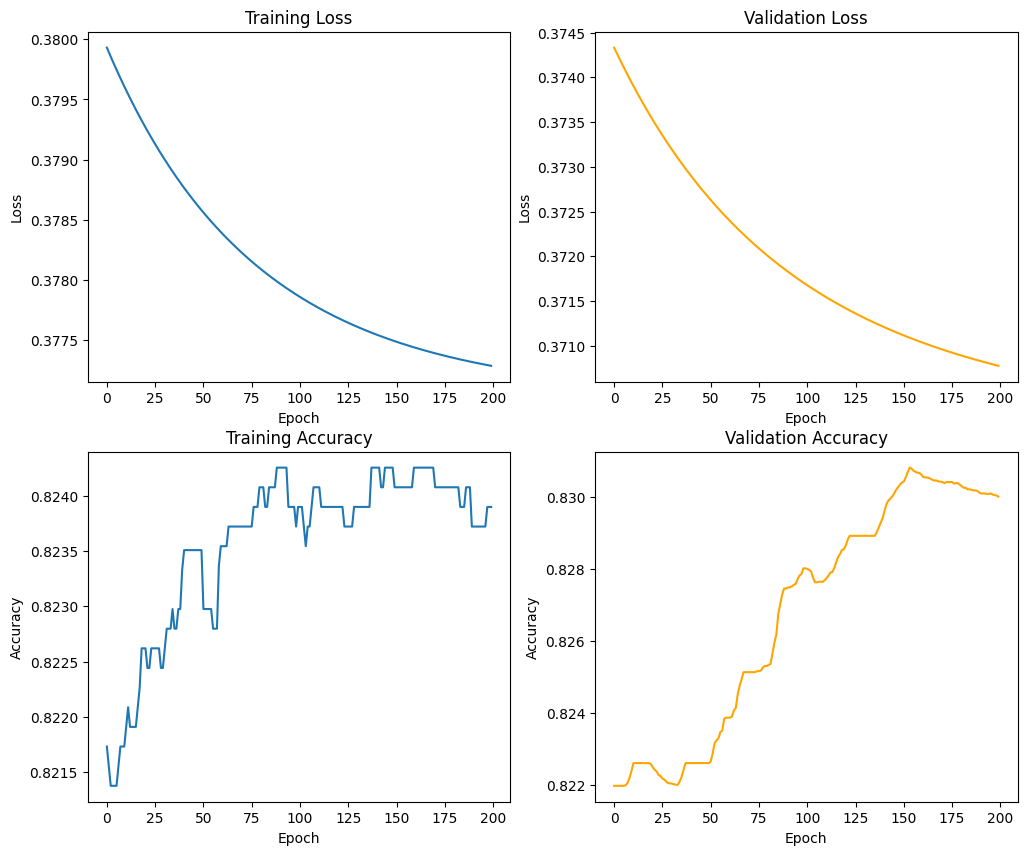

In [46]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

ax[0, 0].plot(train_losses)
ax[0, 0].set(xlabel='Epoch', ylabel='Loss')
ax[0, 0].set_title('Training Loss')

ax[0, 1].plot(val_losses, 'orange')
ax[0, 1].set(xlabel='Epoch', ylabel='Loss')
ax[0, 1].set_title('Validation Loss')

ax[1, 0].plot(train_accs)
ax[1, 0].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 0].set_title('Training Accuracy')

ax[1, 1].plot(val_accs, 'orange')
ax[1, 1].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 1].set_title('Validation Accuracy')

plt.show()

## Evaluate model

In [47]:
val_set_acc = compute_accuracy(X_val, y_val, theta)
test_set_acc = compute_accuracy(X_test, y_test, theta)
print('Evaluation on validation and test set :')
print(f'Accuracy: {val_set_acc}')
print(f'Accuracy: {test_set_acc}')

Evaluation on validation and test set :
Accuracy: 0.8308080808080808
Accuracy: 0.8434343434343434
